# Titanic: Investigando o naufrágio por meio dos dados. Parte II

[No meu primeiro artigo sobre o Titanic](https://jullymaelly.medium.com/titanic-investigando-o-naufr%C3%A1gio-atrav%C3%A9s-dos-dados-339cd1069637), foi realizada a Análise Exploratória dos dados e construído um modelo de Regressão Logística. Nesse artigo, são construídos também os modelos de KNN, Árvore de Decisão, Floresta Aleatória e XGBoost e seus desempenhos são comparados. 

**Utilizando uma base de dados real, o objetivo desse desafio é mensurar a chance de sobrevivencia dos passageiros do Titanic, de acordo com suas características.**

# Checklist do relatório:



1. Definição do Problema; 
2. Modelos Construídos;
3. Construção dos Modelos e Avaliação.



# 1. Definição do Problema

Tratando-se de Machine Learning, existe uma grande variedade de modelos e há a necessidade de analisar qual se aplica melhor, conforme a necessidade - levando em conta os tipos de informações que o dataset possui, e qual o problema a ser resolvido. Após a construção de um modelo, é necessário verificar a acurácia do mesmo e analisar se o resultado obtido é bom o suficiente.

Os modelos construídos nesse artigo são brevemente descritos na próxima sessão.
A descrição do desafio e o dataset estão disponíveis na página do Kaggle: [Titanic - Machine Learning from Disaster](https://https://www.kaggle.com/c/titanic)


## Objetivo
Construção de mais quatro modelos preditivos, que têm seus desempenhos comparados ao modelo de Regressão Logística, aplicado no primeiro artigo. Os modelos utilizam os datasets do Titanic para apontar quais passageiros têm mais chances de sobreviver.

Por fim, é construido também um modelo de previsão de sobrevivência para um passageiro qualquer que for inserido.

## Métrica de desempenho

O score é calculado baseado no número de previsões corretas do modelo, ou seja, considera a acurácia do modelo.


# 2. Modelos Construídos

## Regressão Logística (*Logistic Regression*)

Regressão Logística é um algorítimo de *Machine Learning* e análise preditiva, que baseia-se no conceito de probabilidade, utilizado nos problemas de classificação, para atribuir observações a um cojunto discreto de classes. Temos como exemplos de problemas de classificação transações online fraude ou não fraude, tumor benigno ou maligno e, no caso desse artigo, sobrevivente ao naufrágio ou não sobrevivente. 

A Regressão Logística usa a função sigmóide logística para transformar sua saída e retorna um valor de propabilidade.


## KNN (*K-Nearest Neighbors*)

O KNN é um algorítmo no qual um ponto de dados não classificado recebe classificação com base em sua distância de pontos conhecidos. Ele é usado com mais frequência para classificação, mas também pode ser usado para resolver problemas de regressão.

O KNN é um algorítmo de aprendizagem não paramétrico, e não prexisa de nenhum ponto de dados de treinamento para a construção do modelo. 


## Árvore de Decisão (*Decision Tree*)

Árvore de Decisão é um algorítmo de aprendizado supervisionado para *Machine Learning*, que pode ser usado tanto para regressão como para classificação.
Esse modelo é construído a partir de um processo de indução, que vai dividindo os dados em subconjuntos - cada vez mais puros.  Para selecionar os atributos que irão compor a árvore, são considerados o grau de entropia de um nó - a aleatoriedade em seus valores.


## Floresta Aleatória (*Random Forest*)

O algorítmo de Floresta Aleatória cria Árvores de Decisão em amostras de dados, obtém a previsão de cada uma delas e seleciona a melhor solução. É um método de *esemble* melhor do que uma única Árvore de Decisão, pois reduz o sobreajuste ao calcular a média do resultado.


## XGBoost (*eXtreme Gradient Boosting*)

O XGBoost é uma implementação de árvores de decisão, com aumento de gradiente, projetadas para velocidade e desempenho. Esse modelo é muito rápido quando comparado a outras implementações desse tipo.

O XGBoost domina conjuntos de dados estruturados ou tabulares em problemas de modelagem preditiva de classificação e regressão.


## 3. Construção dos Modelos e Avaliação.

A parte que diz respeito a Análise Exploratória e tratamento dos dados está detalhada [no meu primeiro artigo sobre o Titanic](https://jullymaelly.medium.com/titanic-investigando-o-naufr%C3%A1gio-atrav%C3%A9s-dos-dados-339cd1069637).

Os modelos são executados com os parâmetros *default*.

In [1]:
#pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#visualizar todas as colunas
pd.options.display.max_columns = None

In [2]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [3]:
#juntando os datasets de treino e teste
#salvar os índices dos datasets para recuperação posterior
train_idx = train.shape[0]
test_idx = test.shape[0]

#salvar PassengerId para submissao ao Kaggle
passengerId = test['PassengerId']

#extrair coluna 'Survived' e excluir ela do dataset treino
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

#concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

#seleção de features
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#lidando com valores ausentes
#age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

#fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

#embarked
embarked_top = df_merged['Embarked'].value_counts().index[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

#preparação das variáveis para o modelo
#converter Sex em 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

#dummie variables para Embarked
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

#recuperação dos datasets treino e teste
#dividir df_merged em train e test
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

## Importar bibliotecas dos modelos 

In [4]:
# importar bibliotecas dos modelos 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


## Modelo de Regressão Logística (*Logistic Regression*)

In [5]:
# criação do modelo de Regressão Logística

lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

# verificação da acurácia do modelo

acc_logReg = round(lr_model.score(train, target) * 100, 2)
print(f"Acurácia do Modelo de Regressão Logística: {(acc_logReg)}")

Acurácia do Modelo de Regressão Logística: 80.13


Utilizando os dados de treino, o modelo de Regressão Logística criado apresentou acurácia acima de 80%. Agora, o modelo é aplicado em cima dos dados de teste. 

Como a etapa de criação do arquivo ```csv``` é executada várias vezes, é criada uma função para generalizar esse processo.

In [6]:
# criação da função q gera o csv

def gerar_csv(y_pred, model_name):
  df = pd.DataFrame({
        "PassengerId": passengerId,
        "Survived": y_pred
      })
  
  df.to_csv(f'./submission_{model_name}.csv', index=False)

  return df.head()

In [7]:
# criação do arquivo csv
y_pred_lr = lr_model.predict(test)

gerar_csv(y_pred_lr, "lr")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


No Kaggle, o modelo aplicado conseguiu um *score* de 76%

<img src='https://raw.githubusercontent.com/jullymaellylima/data_science/master/kaggle%20titanic.jpg' width="80%">



## Modelo de KNN (*K-Nearest Neighbors*)

In [8]:
# criar o modelo de KNN

knn_model = KNeighborsClassifier()
knn_model.fit(train, target)

# verificar a acurácia do modelo

acc_knn = round(knn_model.score(train, target) * 100, 2)
print(f"Acurácia do Modelo de KNN: {(acc_knn)}")

Acurácia do Modelo de KNN: 80.7


In [9]:
# criação do arquivo csv

y_pred_knn = knn_model.predict(test)

gerar_csv(y_pred_knn, "knn")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


No Kaggle, o Modelo KNN alcançou um *score* de 65%.

<img src= 'https://github.com/jullymaellylima/data_science/blob/master/titanic/imgKaggle/knn.jpg?raw=true' width="80%">


## Modelo de Árvore de Decisão (*Decision Tree*)

In [10]:
# criação de um modelo de árvore de decisão

tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# verificação da acurácia do modelo

acc_tree = round(tree_model.score(train, target) *100, 2)
print(f"Acurácia do modelo de Árvore de Decisão: {(acc_tree)}")

Acurácia do modelo de Árvore de Decisão: 82.72


In [11]:
# criação do arquivo csv

y_pred_tree = tree_model.predict(test)

gerar_csv(y_pred_tree, "tree")

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


No Kaggle, a acurácia foi de 77%, menor do que a acurácia do treino, como já era previsto.

<img src='https://raw.githubusercontent.com/jullymaellylima/data_science/master/image.png' width="80%">




## Modelo de Floresta Aleatória (*Random Forest*)

In [12]:
# criação de um modelo de Floresta Aleatória

rf_model = RandomForestClassifier(max_depth=3)
rf_model.fit(train, target)

# verificação da acurácia do modelo

acc_rf = round(rf_model.score(train, target) *100, 2)
print(f"Acurácia do modelo de Floresta Aleatória: {(acc_rf)}")

Acurácia do modelo de Floresta Aleatória: 83.5


In [13]:
# criação do arquivo csv

y_pred_rf = rf_model.predict(test)

gerar_csv(y_pred_rf, "rf")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


No Kaggle a acurácia do modelo foi de 77%.

<img src='https://github.com/jullymaellylima/data_science/blob/master/titanic/imgKaggle/rf.jpg?raw=true' width="80%">


## Modelo de XGBoost (*eXtreme Gradient Boosting*)

In [14]:
# criação do modelo XGBoost

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='error')
xgb_model.fit(train, target)

# verificação da acurácia do modelo

acc_xgb = round(xgb_model.score(train, target) *100, 2)
print(f"Acurácia do modelo de Árvore de Decisão: {(acc_xgb)}")

Acurácia do modelo de Árvore de Decisão: 87.88


In [15]:
# criação do arquivo csv

y_pred_xgb = xgb_model.predict(test)

gerar_csv(y_pred_xgb, "xgb")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


O modelo apresentou no Kaggle uma acurácia de 78%.

<img src='https://github.com/jullymaellylima/data_science/blob/master/titanic/imgKaggle/xgb.jpg?raw=true' width="80%">



## Comparação entre os resultados

In [16]:
# comparação dos resultados

resultado = pd.DataFrame({
        "MODELO": ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'XGBoost'],
        "ACURACIA_DO_MODELO": [acc_logReg, acc_knn, acc_tree, acc_rf, acc_xgb], 
        "SCORE_KAGGLE": [76.31, 65.55, 77.51, 77.51, 78.22]
      })

resultado

,MODELO,ACURACIA_DO_MODELO,SCORE_KAGGLE
0,Logistic Regression,80.13,76.31
1,K-Nearest Neighbors,80.70,65.55
2,Decision Tree,82.72,77.51
3,Random Forest,83.50,77.51
4,XGBoost,87.88,78.22


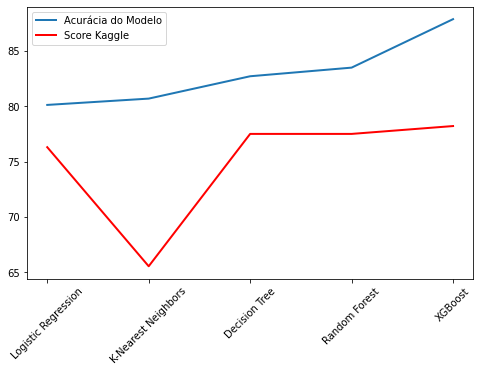

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(resultado['MODELO'], resultado['ACURACIA_DO_MODELO'], 
         label='Acurácia do Modelo',
         linewidth=2.0)
plt.plot(resultado['MODELO'], resultado['SCORE_KAGGLE'], 
         color='red',   
         linewidth=2.0,
         label='Score Kaggle' 
        )
plt.xticks(rotation=45)
plt.legend()
plt.savefig('comparacao.png', dpi = 300)

É possível concluir que os respectivos desempenhos dos modelos no Kaggle apresentam uma acurácia menor, o que já é esperado, pois os modelos foram treinados com base nos dados de treino, e têm um *fit* melhor com esses dados.

O modelo KNN, apesar de ter tido um desempenho - com os dados de treino - melhor que o modelo de Regressão Logística, foi o que apresentou a acurácia mais baixa dentre todos. E o XGBoost foi o que obteve o melhor desemprenho, tanto com os dados de treino, como no Kaggle.



## Eu sobreviveria ao Titanic?

Analiso se eu, caso estivesse a bordo do Titanic, e de acordo com o modelo, sobreviveria ao naufrágil. Considero que estaria na segunda classe, sem filhos e sem acompanhantes, pagando o ticket de preço médio e embarcando no porto em Southampton.

In [18]:
#declarar os valores das variáveis
jully_maelly = np.array([2, 1, 29, 0, 0, 32.2, 0, 0, 1]).reshape((1, -1))

#verificar se eu teria sobrevivido
print(f"Jully Maelly:\t{(tree_model.predict(jully_maelly)[0])}")

Jully Maelly:	1


De acordo com o modelo aplicado, eu teria sobrevivido ao naufrágio.